### EMPLOYEE  SALARY  PREDICTION USING LINEAR REGRESSION:

### Import packages / libraries:

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read Data File:

In [49]:
df = pd.read_csv("D:/datasets/Dataset09-Employee-salary-prediction.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


### Number of rows and columns:

In [50]:
df.shape

(375, 6)

### Datatype of Columns:

In [51]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

### Information of Dataset:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### Data Preprocessing:

### 1) Finding duplicate records in data:

In [53]:
df_duplicates = df.duplicated().sum()
print("No of duplicate records:",df_duplicates)

No of duplicate records: 50


### 2) Dropping duplicate records from the data:

In [54]:
new_df = df.drop_duplicates(keep = 'first')
print("Shape of the Dataframe before dropping duplicates:",df.shape)
print("Shape of the Dataframe after dropping duplicates:",new_df.shape)

Shape of the Dataframe before dropping duplicates: (375, 6)
Shape of the Dataframe after dropping duplicates: (325, 6)


### 3) Finding missing / null values in the data:


In [55]:
print("Null values in the dataset:\n",new_df.isnull().sum())

Null values in the dataset:
 Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64


### 4) Dropping null values from the data:

In [56]:
new_df.dropna(how = 'any' , inplace = True)

### 5) Size of the Dataset after dropping null values:

In [57]:
new_df.shape

(324, 6)

### Exploratory Data Analysis (EDA):

### 1) Statistics of the numerical columns :

In [58]:
new_df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


### 2) Correlation matrix among numerical features:

In [59]:
corr = new_df[['Age' ,'Years of Experience','Salary']].corr()
corr

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

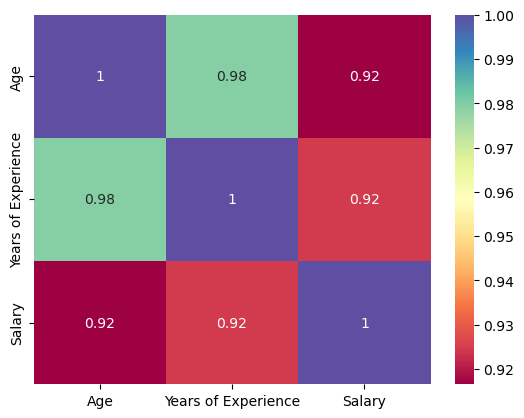

In [14]:
sns.heatmap(corr, annot = True,cmap = 'Spectral')

### 3) Data Visualization:

### Count plot for Categorical columns:

In [60]:
new_df['Gender'].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

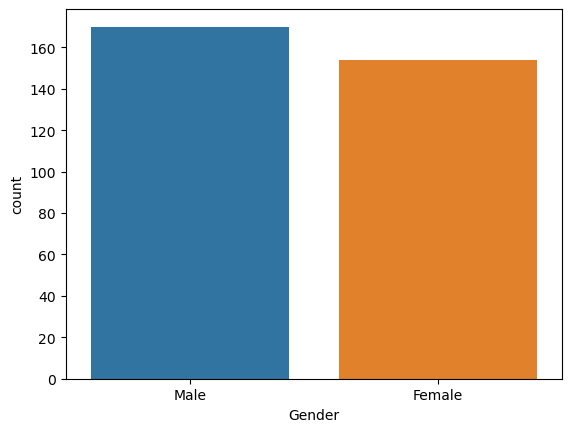

In [61]:
sns.countplot(data = new_df, x = 'Gender')
plt.show()

In [62]:
new_df['Education Level'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64

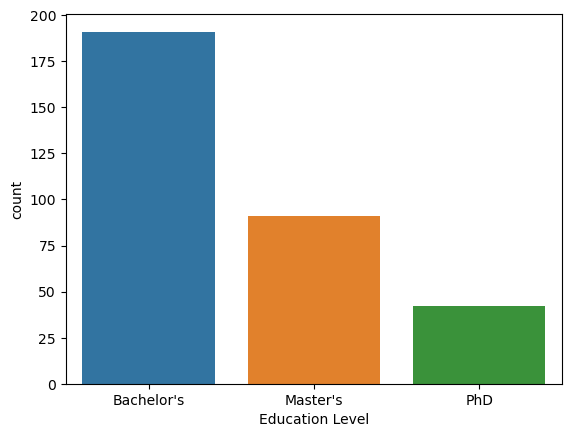

In [18]:
sns.countplot(data = new_df, x = 'Education Level')
plt.show()

In [63]:
new_df['Job Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job Title, Length: 174, dtype: int64

### Histogram / Box Plot  for numerical columns:

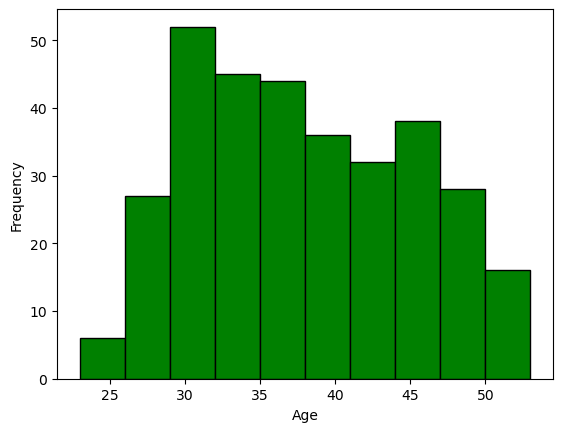

In [64]:
plt.hist(new_df['Age'],bins =10 , color = 'green',edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

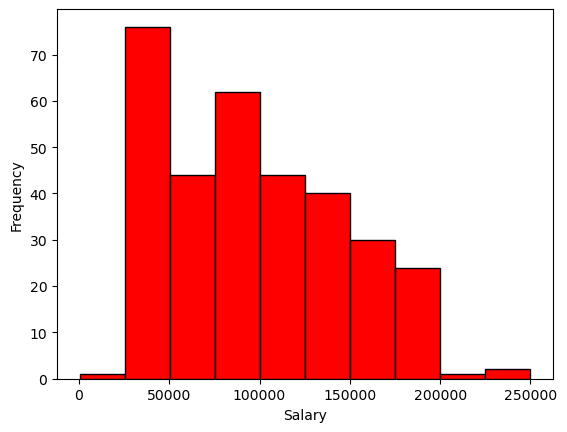

In [17]:
plt.hist(new_df['Salary'],bins =10 ,color = 'red',edgecolor = 'black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<Axes: >

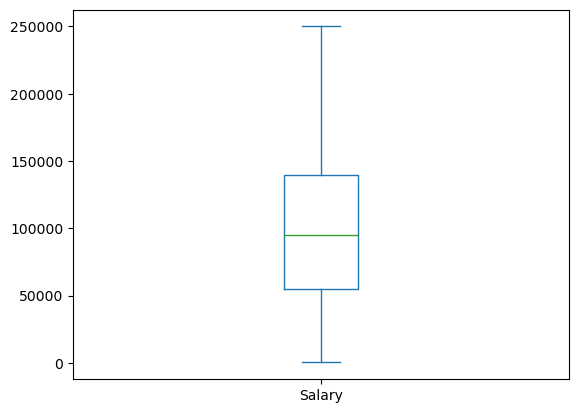

In [66]:
new_df['Salary'].plot(kind= 'box')

<Axes: >

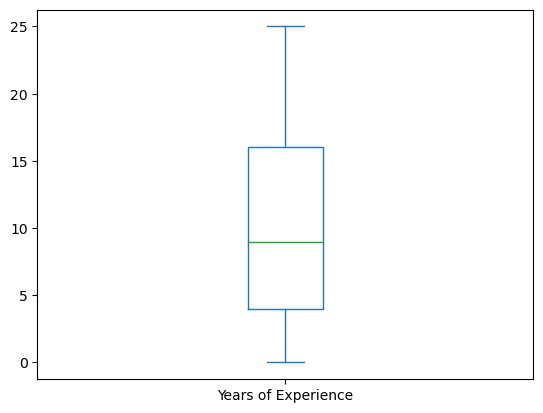

In [67]:
new_df['Years of Experience'].plot(kind= 'box')

### Feature Engineering:

### 1) Label Encoding:


In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df['Gender_encode'] = label_encoder.fit_transform(new_df['Gender'])
new_df['Education_level_encode'] = label_encoder.fit_transform(new_df['Education Level'])
new_df['Job_title_encode'] = label_encoder.fit_transform(new_df['Job Title'])

### 2) Data after Label Encoding:

In [18]:
new_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encode,Education_level_encode,Job_title_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


### 3) Feature Scaling:

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df['Age_scaled'] = scaler.fit_transform(new_df[['Age']])
new_df['Experience_years_scaled'] = scaler.fit_transform(new_df[['Years of Experience']])

### 4) Data after Feature Scaling:

In [71]:
new_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encode,Education_level_encode,Job_title_encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


### 5) Independent and Dependent features:

In [72]:
X = new_df[['Age_scaled','Gender_encode','Education_level_encode','Job_title_encode','Experience_years_scaled']]
y = new_df['Salary']

In [73]:
X.head()

,Age_scaled,Gender_encode,Education_level_encode,Job_title_encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


### Model Development:

### 1) Splitting the data into Training and Testing: 

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [76]:
x_train.shape, y_train.shape # 80% train data 

((259, 5), (259,))

In [75]:
x_test.shape, y_test.shape  # 20% test data 

((65, 5), (65,))

### 2) Model Selection:

In [78]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

### 3) Model Training:

In [79]:
lr_model.fit(x_train,y_train)

LinearRegression()

### 4) Model Predictions:

In [81]:
y_pred = lr_model.predict(x_test)
y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

# 5) Scatter plot between actual and predicted values:

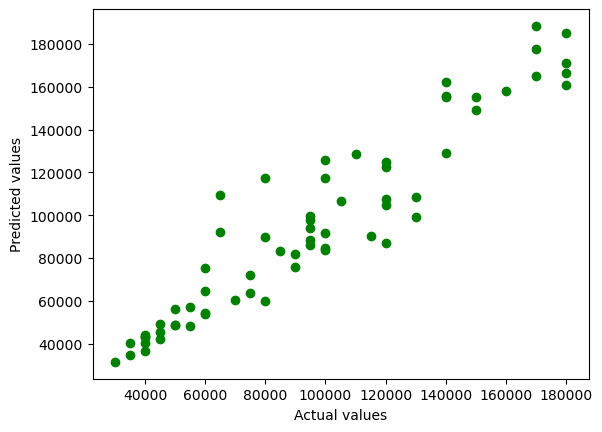

In [91]:
plt.scatter(y_test,y_pred,c = 'green')
plt.xlabel("Actual values")
plt.ylabel('Predicted values')
plt.show()

### 5) Model Evaluation:

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

### 6) Model Accuarcy:

In [37]:
print(f"Accuracy of the model: {round(r2_score(y_test,y_pred),4)*100}%")

Accuracy of the model: 89.11%


### Mean Absolute Error:

In [38]:
print(f"mean absolute error: {round(mean_absolute_error(y_test,y_pred),3)}")    

mean absolute error: 10570.786


## Mean Squared Error:

In [39]:
mse = mean_squared_error(y_test,y_pred)
print(f"mean squared error: {round(mse,3)}") 

mean squared error: 205754135.717


### Root Mean Squared Error:

In [40]:
print(f"root mean squared error: {round((mse)**0.5,3)}") 

root mean squared error: 14344.132


### Coefficients:

In [42]:
lr_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

### Intercepts:

In [43]:
lr_model.intercept_

86001.49320553198

# Exporting the model:

In [ ]:
import pickle 
pickle_out = open('lr_model.pkl',"wb")
pickle.dump(lr_model,pickle_out)
pickle_out.close()